# Numpy Image manipulation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Custom image

In [ ]:
from PIL import Image # You can try to upload your own image with PIL.

# load the image
image = Image.open('example.jpg')

# convert the image to a numpy array
image_array = np.array(image)

print(image_array.shape)

# show the image
plt.imshow(image_array)

## Pedefined image

(768, 1024, 3)


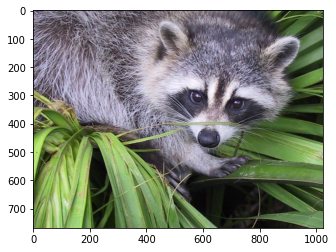

In [2]:
from scipy.misc import face

# load the image from the scipy.misc.face() function
image_array = face()

print(image_array.shape)

# show the image
plt.imshow(image_array)

In [3]:
# this is the raw form of the image
image_array

array([[[121, 112, 131],
        [138, 129, 148],
        [153, 144, 165],
        ...,
        [119, 126,  74],
        [131, 136,  82],
        [139, 144,  90]],

       [[ 89,  82, 100],
        [110, 103, 121],
        [130, 122, 143],
        ...,
        [118, 125,  71],
        [134, 141,  87],
        [146, 153,  99]],

       [[ 73,  66,  84],
        [ 94,  87, 105],
        [115, 108, 126],
        ...,
        [117, 126,  71],
        [133, 142,  87],
        [144, 153,  98]],

       ...,

       [[ 87, 106,  76],
        [ 94, 110,  81],
        [107, 124,  92],
        ...,
        [120, 158,  97],
        [119, 157,  96],
        [119, 158,  95]],

       [[ 85, 101,  72],
        [ 95, 111,  82],
        [112, 127,  96],
        ...,
        [121, 157,  96],
        [120, 156,  94],
        [120, 156,  94]],

       [[ 85, 101,  74],
        [ 97, 113,  84],
        [111, 126,  97],
        ...,
        [120, 156,  95],
        [119, 155,  93],
        [118, 154,  92]]

In [4]:
image_array.max()

255

Can you guess why this is the maximum value?

C:\Users\2000076134\AppData\Local\Temp\ipykernel_11456\3778948092.py:5: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


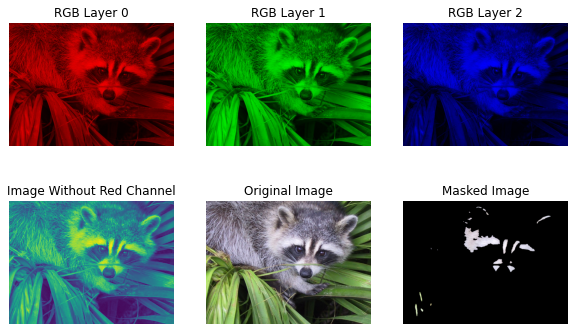

In [5]:
# extract the red channel of the image
red_channel = image_array[:,:,0]

# apply a Gaussian blur to the red channel
from scipy.ndimage.filters import gaussian_filter
blurred_red = gaussian_filter(red_channel, sigma=3)

# create a binary mask by thresholding the blurred image
threshold = 200
mask = blurred_red < threshold

# apply the mask to the original image
masked_image = np.copy(image_array)
masked_image[mask] = [0, 0, 0]

# display the original and masked images
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10,6))

for c, ax_0 in zip(range(3), ax[0]):
    rgb_img = np.zeros(image_array.shape, dtype="uint8")
    rgb_img[:,:,c] = image_array[:,:,c]
    ax_0.imshow(rgb_img)
    ax_0.set_title(f'RGB Layer {c}')

ax[1,0].imshow(red_channel)
ax[1,0].set_title('Image Without Red Channel')

ax[1,1].imshow(image_array)
ax[1,1].set_title('Original Image')

ax[1,2].imshow(masked_image)
ax[1,2].set_title('Masked Image')

for image in ax.flatten():
    image.set_axis_off()
    
plt.show()

Images are made up of pixel values. Numbers define the colors in the image as basically an array. 

This code loads an image, converts it to a NumPy array, then separates each color layer (first row) and extracts the red channel of the image, applies a Gaussian blur to the red channel, creates a binary mask by thresholding the blurred image, applies the mask to the original image, and displays the image without red channel, the original and masked image in the (second row).

You can explore more image manipulation and transformations in this sources:  
* [A beginner’s guide to image processing using NumPy](https://analyticsindiamag.com/a-beginners-guide-to-image-processing-using-numpy/)  
* [Image manipulation and processing using Numpy and Scipy](https://scipy-lectures.org/advanced/image_processing/)

> Content created by **Carlos Cruz-Maldonado**.  
> Feel free to ping me at any time.